# The Purpose of This Notebook will be To highlight the Steps Necessary to Make the Manhattan Bar Crawl Generator APP

# Data Collection

In [101]:
# Data was scraped from Yelp using Scrapy, the code is below

In [102]:
import scrapy
import time

neighborhoods=['https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Manhattan',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Alphabet_City',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Battery_Park',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Central_Park',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Chelsea',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Chinatown',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Civic_Center',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:East_Harlem',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:East_Village',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Financial_District',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Flatiron',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Gramercy',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Greenwich_Village',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Harlem',
 "https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Hell's_Kitchen",
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Inwood',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Kips_Bay',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Koreatown',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Little_Italy',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Lower_East_Side',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Manhattan_Valley',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Marble_Hill',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Meatpacking_District',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Midtown_East',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Midtown_West',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Morningside_Heights',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Murray_Hill',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:NoHo',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Nolita',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Roosevelt_Island',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:SoHo',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:South_Street_Seaport',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:South_Village',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Stuyvesant_Town',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Theater_District',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:TriBeCa',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Two_Bridges',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Union_Square',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Upper_East_Side',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Upper_West_Side',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Washington_Heights',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:West_Village',
 'https://www.yelp.com/search?start=0&cflt=nightlife&l=p:NY:New_York:Manhattan:Yorkville']





class YelpSpider(scrapy.Spider):

    name = 'yelp_bar_scraper'

    custom_settings = {
        "DOWNLOAD_DELAY": 3,
        "CONCURRENT_REQUESTS_PER_DOMAIN": 3,
        "HTTPCACHE_ENABLED": True,
        'ROBOTSTXT_OBEY': False

    }

    start_urls = ['https://www.yelp.com']


    def parse(self, response):

        for link in neighborhoods:

            try:
                yield scrapy.Request(
                url=link,
                callback=self.parse_neighborhood
                )

            except:
                continue


    def parse_neighborhood(self, response):

        for href in response.xpath('//span[@class="indexed-biz-name"]/a/@href').extract():

            try:
                yield scrapy.Request(
                url='https://www.yelp.com' + href,
                callback=self.parse_bar,
                meta={'url': 'https://www.yelp.com' + href}
            )

            except:
                continue


        next_url = 'https://www.yelp.com/'+ response.xpath('//div[@class="arrange_unit"]/a/@href').extract()[-1]

        yield scrapy.Request(
            url=next_url,
            callback=self.parse_neighborhood
        )

    def parse_bar(self, response):

        url = response.request.meta['url']

        name = response.xpath('//h1/text()').extract()[0]

        neighborhood = response.xpath('//span[@class="neighborhood-str-list"]/text()').extract()[0]

        address= response.xpath('//strong[@class="street-address"]/address/text()').extract()

        price =  response.xpath('//span[@class="business-attribute price-range"]/text()').extract()[0]

        reviews = response.xpath('//div[@class="review-content"]/p/text()').extract()

        feature_names= response.xpath('//div[@class="short-def-list"]/dl/dt/text()').extract()

        feature_atts= response.xpath('//div[@class="short-def-list"]/dl/dd/text()').extract()



        yield {
            'url': url,
            'name': name,
            'neighborhood': neighborhood,
            'address': address,
            'price': price,
            'reviews': reviews,
            'feature_names': feature_names,
            'feature_atts': feature_atts
            }


# Data Cleaning

In [103]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_json('yelp_bar.json')

In [105]:
def clean_up(x):
    '''This function will take a list as input. It will strip all whitespace and \n from the first element of the string.'''
    try:
        import re
        x=re.sub('\s+',' ',x).strip()
        return x
    except:
        return np.nan

In [106]:
def clean_up_neighborhood(x):
    '''Takes in string, removes whitespace, \n and only selects first neighborhood listed'''
    try:
        import re
        x=re.sub('\s+',' ',x).strip()
        if ',' in x:
            return x[:x.index(',')]
        else:
            return x
    except:
        return np.nan

In [107]:
def clean_up2(x):
    '''This function will take a list of elements as input. It will strip all whitespace and \n from all elements of the string.'''
    a=[]
    for i in x:
        try:
            import re
            x=re.sub('\s+',' ',i).strip()
            a.append(x)
        except:
            return np.nan
    return a

In [108]:
df['address']=df.apply(lambda x: ' '.join(clean_up2(x['address'])),axis=1)

In [109]:
df['name']=df.apply(lambda x: ' '.join(list(x['name'].split())),axis=1)

In [110]:
df['neighborhood']=df.apply(lambda x: clean_up_neighborhood(x['neighborhood']),axis=1 ) #some bars list two neighborhoods, I chose first one

In [111]:
def clean_up2(x):
    '''This function will take a list of elements as input. It will strip all whitespace and \n from all elements of the string.'''
    a=[]
    for i in x:
        try:
            import re
            x=re.sub('\s+',' ',i).strip()
            a.append(x)
        except:
            return np.nan
    return a

In [112]:
reviews_df=df[['name','reviews']]
reviews_df.to_pickle('yelp_reviews.pickle') #save this to work in separate notebook

## Now use the GMaps geocoding api to get latitude and longitude for each venue

In [ ]:
def gmaps_geocode(address):
    '''This function takes an address and returns tuple pair of lat,lng coordinates using gmaps api'''
    
    import googlemaps
    gmaps=googlemaps.Client(key='mykey')
    
    coord=[]
    try:
        geocode_result = gmaps.geocode(address)
    
        coord.append(geocode_result[0]['geometry']['location']['lat'])
        coord.append(geocode_result[0]['geometry']['location']['lng'])
        
        return coord
   
    except:
        return None
        
    
    
    

In [ ]:
df['coordinates']=df.apply(lambda x: gmaps_geocode(x['address']), axis=1)

In [113]:
df.to_pickle('bars_complete.pickle')

# Topic Modeling using LDA

In [114]:
df=pd.read_pickle('yelp_reviews.pickle')


In [115]:
def clean_up3(x):
    '''This function will take a list of elements as input. It will strip \xa0 from all elements of the string.'''
    import unicodedata
    a=[]
    for i in x:
        i=unicodedata.normalize('NFKD', i)
        a.append(i)
    return a

In [116]:
def joiner(x):
    '''This function will take a list of strings as input. It will output a list with a single long string.'''
    s=''
    for i in x:
        s+=i
    return s

In [117]:
df['reviews']=df.apply(lambda x: joiner(x['reviews']),axis=1) ###need to have each bar's reviews as big string in a list

In [118]:
df.to_pickle('reviews_for_topics.pickle')

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
count_vectorizer = CountVectorizer(  
    ngram_range=(1, 2),
    stop_words='english',
    token_pattern="\\b[a-z][a-z]+\\b",
    min_df=5,)

In [121]:
count_vectorizer.fit(df['reviews'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [122]:
counts=count_vectorizer.transform(df['reviews'])

In [123]:
from sklearn.decomposition import LatentDirichletAllocation


In [124]:
lda = LatentDirichletAllocation(
    n_components=10, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)

In [125]:
lda.fit(counts)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [126]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print('-'*50)

In [127]:
print_top_words(lda, count_vectorizer.get_feature_names(), 10) ###viewing our 10 topics and associated words

Topic #0: ramen japanese broth sake miso noodles sake bar gyoza curry pork
--------------------------------------------------
Topic #1: music people club night dance venue dj line cover crowd
--------------------------------------------------
Topic #2: food good great place just bar really like service nice
--------------------------------------------------
Topic #3: place bar good great drinks food like just time really
--------------------------------------------------
Topic #4: good food place great just restaurant service delicious like ordered
--------------------------------------------------
Topic #5: cigar cigars cheesesteak philly cigar bar cheesesteaks cigar lounge shorty hooters selection cigars
--------------------------------------------------
Topic #6: good food place bar time great service like nice just
--------------------------------------------------
Topic #7: food place bar good like great service came just got
--------------------------------------------------
Topi

In [128]:
count_vectorizer = CountVectorizer(  
    ngram_range=(1, 2),
    stop_words='english',
    token_pattern="\\b[a-z][a-z]+\\b",
    min_df=10,
    max_df=0.8)    ###lets try running model again with higher min_df, and setting a max_df (get rid of words like food,good)

In [129]:
count_vectorizer.fit(df['reviews'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=10,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [130]:
counts=count_vectorizer.transform(df['reviews'])

In [131]:
counts.shape ##we removed over half of our words, let's see how this turns out!!!

(2431, 35653)

In [132]:
lda = LatentDirichletAllocation(
    n_components=10, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)   

In [133]:
lda.fit(counts)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [134]:
print_top_words(lda, count_vectorizer.get_feature_names(), 10) ###viewing our 10 topics and associated words

Topic #0: pizza pizzas crust slice pie toppings pepperoni slices pies pizza place
--------------------------------------------------
Topic #1: restaurant wine brunch delicious pizza hour menu sauce table try
--------------------------------------------------
Topic #2: rice chicken coffee pork fried spicy korean sushi ramen soup
--------------------------------------------------
Topic #3: happy beer hour happy hour menu burger fries order bartender area
--------------------------------------------------
Topic #4: music fun bartender room going crowd know party small new
--------------------------------------------------
Topic #5: burger wings restaurant chicken menu happy fries order delicious sauce
--------------------------------------------------
Topic #6: order chicken restaurant menu delicious happy brunch table dinner burger
--------------------------------------------------
Topic #7: restaurant delicious wine menu dinner dish table amazing cheese brunch
--------------------------

In [135]:
#lets try setting n_topics to 20 to get better granularity/more discrete topics**

In [136]:
lda2 = LatentDirichletAllocation(
    n_components=20, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)   

In [137]:
lda2.fit(counts)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=20, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [138]:
print_top_words(lda2, count_vectorizer.get_feature_names(), 10) 

Topic #0: hour order burger brunch delicious restaurant fries wings menu table
--------------------------------------------------
Topic #1: oysters delicious happy hour pizza restaurant happy hour menu wine table
--------------------------------------------------
Topic #2: restaurant delicious menu dinner brunch table amazing dish sauce try
--------------------------------------------------
Topic #3: dish pizza restaurant small menu delicious brunch try cheese beer
--------------------------------------------------
Topic #4: brunch hour happy order happy hour fries menu bartender burger cheese
--------------------------------------------------
Topic #5: bartender music hour area cocktails table happy cool bartenders fun
--------------------------------------------------
Topic #6: wine restaurant delicious order cheese try fries small happy table
--------------------------------------------------
Topic #7: beer happy burger hour happy hour fries wings chicken beers tacos
---------------

In [139]:
count_vectorizer3 = CountVectorizer(  ###lets set max df to 0.3 to try and get better, more unique topics 
    ngram_range=(1, 2),
    stop_words='english',
    token_pattern="\\b[a-z][a-z]+\\b",
    min_df=10,
    max_df=0.3)

In [140]:
count_vectorizer3.fit(df['reviews'])
counts3=count_vectorizer3.transform(df['reviews'])

In [141]:
lda3 = LatentDirichletAllocation(
    n_components=10, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)   

In [142]:
lda3.fit(counts3)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [143]:
print_top_words(lda3, count_vectorizer3.get_feature_names(), 15) ##let's print 15 words to see if that makes topics more obvious

Topic #0: club dance venue line dj jazz event cover karaoke dancing stage charge tickets comedy bouncer
--------------------------------------------------
Topic #1: pasta italian tacos pizza shrimp steak oysters french fish salmon entree octopus portions plates lamb
--------------------------------------------------
Topic #2: view rooftop views hotel outdoor rooftop bar roof summer building elevator german lounge park empire games
--------------------------------------------------
Topic #3: cheesesteak middle eastern sandwich game soup eastern philly wings pasta eggs italian toast pork french east
--------------------------------------------------
Topic #4: hookah indian naan hookahs mint indian food paneer coal masala coals tikka smoke belly hookah lounge flavors
--------------------------------------------------
Topic #5: sandwich wings eggs mac bacon mac cheese breakfast toast burgers pizza french steak avocado coffee egg
--------------------------------------------------
Topic #6: 

In [144]:
# Try one last time with 30 topics 

In [145]:
lda5= LatentDirichletAllocation(
    n_components=30, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)   

In [146]:
lda5.fit(counts3)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=30, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [147]:
print_top_words(lda5, count_vectorizer3.get_feature_names(), 15)

Topic #0: pasta tacos eggs shrimp entree gluten free gluten flavorful steak east husband pizza ravioli italian game
--------------------------------------------------
Topic #1: pasta italian gnocchi spaghetti ravioli oil meatballs italian food pastas al burrata tiramisu mozzarella olive italy
--------------------------------------------------
Topic #2: ramen paella games spicy bacon ues steak mac chocolate rice fish shared tacos portions east
--------------------------------------------------
Topic #3: pizza pasta sports wings game coffee eggs sandwich salmon crepe games east crepes bacon egg
--------------------------------------------------
Topic #4: pizza crust italian breakfast pizzas soup mozzarella game bacon tomato sports spicy slice egg pies
--------------------------------------------------
Topic #5: eggs steak tacos cream avocado corn pasta chips fish ice bacon pub groupon irish portions
--------------------------------------------------
Topic #6: pizza eggs slice fish pasta 

# Topic Modeling With NMF

In [148]:
df=pd.read_pickle('reviews_for_topics.pickle')

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.3, min_df=0.01, stop_words='english')

In [151]:
tfidf_vectorizer.fit(df['reviews'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [152]:
counts_nmf=tfidf_vectorizer.transform(df['reviews'])

In [153]:
from sklearn.decomposition import NMF

In [154]:
nmf= NMF (n_components=30,
         random_state=1, 
          alpha=.1, l1_ratio=.5,
          init='nndsvd')

In [155]:
nmf.fit(counts_nmf)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvd', l1_ratio=0.5,
  max_iter=200, n_components=30, random_state=1, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [156]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print('-'*50)

In [157]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), 15)

Topic #0: owner east village upstairs event sandwich whiskey west waited downstairs craft mac speakeasy glasses tap
--------------------------------------------------
Topic #1: club dance dj line bouncers cover coat dancing bouncer girls hop promoter security hip vip
--------------------------------------------------
Topic #2: irish pub pie guinness fish pint chips pot pubs ireland shepherd onion st shepherds midtown
--------------------------------------------------
Topic #3: tacos mexican taco margaritas guacamole margarita chips guac salsa fish burrito nachos enchiladas tortilla corn
--------------------------------------------------
Topic #4: rooftop view views roof empire elevator building state rooftops outdoor summer hotel indoor sunset skyline
--------------------------------------------------
Topic #5: hookah hookahs smoke coal lounge mint smoking cafe mist charge dj tea dancer belly sangria
--------------------------------------------------
Topic #6: pasta italian gnocchi spa

In [159]:
topic_probs=nmf.transform(counts_nmf)

In [160]:
topic_df=pd.DataFrame(topic_probs)

In [161]:
topics=['speakeasy','club/dance','irish','mexican','rooftop','hookah',\
       'italian','karaoke','concert','pizza','jazz/blues','comedy',\
       'theater','dive','hotel','brunch','pool/games','seafood','sushi',\
       'korean','cafe','sports_1','french','ramen','steak','thai',\
       'smoking','lgbt','african/caribbean','sports_2']

In [162]:
topic_df.columns=topics

In [163]:
df=pd.merge(df,topic_df, left_index=True,right_index=True)

In [164]:
df.to_pickle('bar_topics.pickle')

# Building the Recommender

In [165]:
from sklearn.metrics.pairwise import cosine_similarity


In [166]:
df_topics=df.drop(['name','reviews'],axis=1)

In [167]:
dists=cosine_similarity(df_topics)

In [168]:
sims_df=pd.DataFrame(dists)

In [169]:
sims_df.index=df_topics.index

In [170]:
sims_df.columns=df_topics.index

In [183]:
sims_df.to_pickle('bar_similarity.pickle')

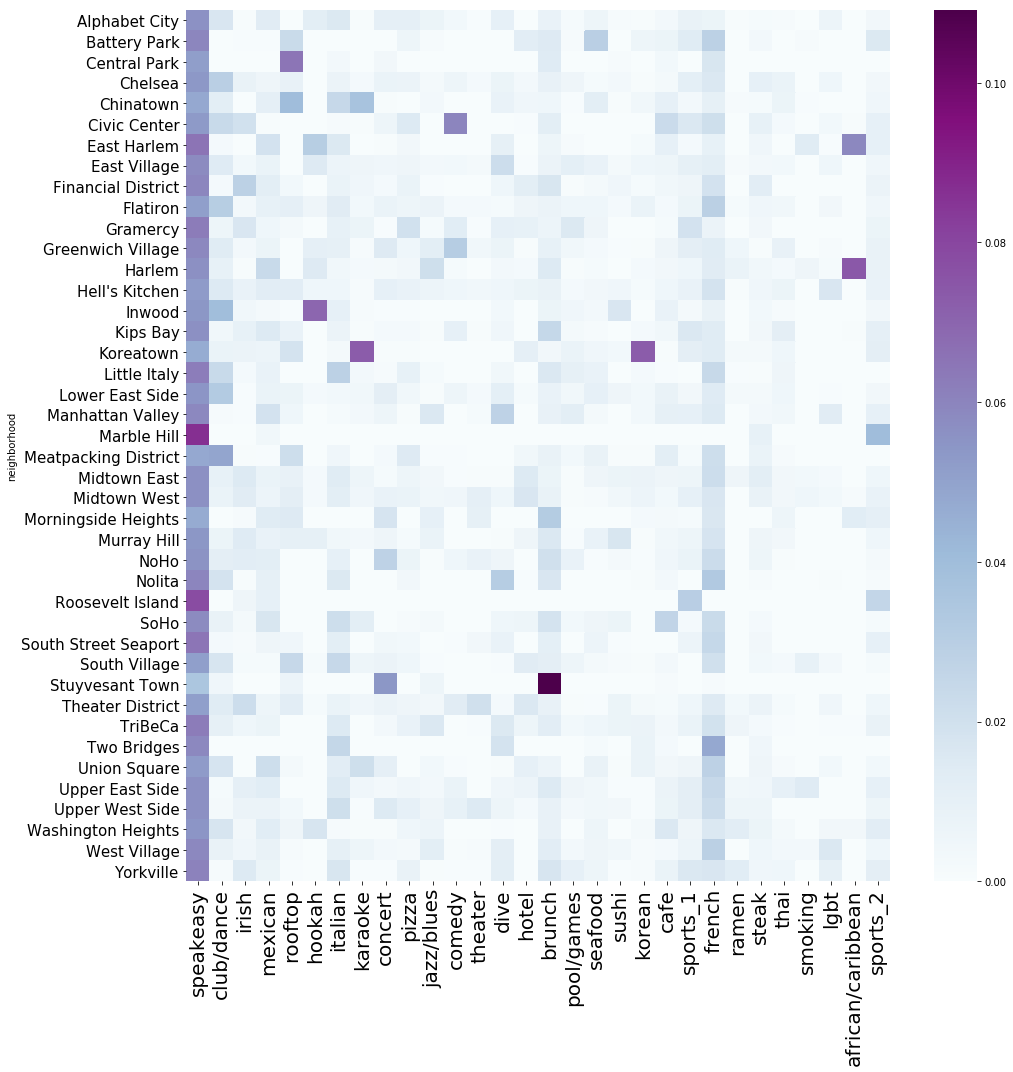

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
plt.xticks(size=20)
plt.yticks(size=15)
heat=sns.heatmap(df_bt.groupby('neighborhood').mean(), cmap="BuPu")
plt.tight_layout()
#plt.savefig('heatmap.pdf')

In [188]:
sims_df=pd.read_pickle('bar_similarity.pickle')

In [189]:
df=pd.read_pickle('bars_complete.pickle')

In [190]:
bars_df=df[['name','neighborhood','price','url']]

In [191]:
df_bt=bars_df.join(df_topics)

In [192]:
bars_df.set_index(bars_df.name, inplace=True)

In [ ]:
def find_nearest_bars(bar, d=1 ,number=10):
    from math import radians, cos, sin, asin, sqrt
    import pandas as pd

    def haversine(lon1, lat1, lon2, lat2):
        """
        Calculate the great circle distance between two points 
        on the earth (specified in decimal degrees)
        """
        # convert decimal degrees to radians 
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a)) 
        r = 3956 # For miles
        return c * r

    def is_in_area(center_lon, center_lat, test_lon, test_lat, radius = 1):
        a = haversine(center_lon, center_lat, test_lon, test_lat)
        if a <= radius:
            return True
        return False
    
    
    import jellyfish

    def get_closest_match(x, list_strings):

        best_score= 0
        best_match=None

        for title in list_strings:

            current_score=jellyfish.jaro_winkler(x, title)

            if current_score > best_score:
                best_score = current_score
                best_match = title 

        if best_score > 0.75:
            return best_match

        else:
            return None
    
    
    bar = get_closest_match(bar, bars_df.index)
    
    bool_array=[]
    
    for i in bars_df['coordinates']:
        
        try:
            bool_array.append(is_in_area(bars_df[bars_df.index==bar]['coordinates'][0][0]\
                                         ,bars_df[bars_df.index==bar]['coordinates'][0][1],\
                                         i[0],i[1], radius=d))
        
        except:
            bool_array.append(None)
            
    bool_dict=dict(zip(bars_df.index,bool_array))
    
    bool_df=pd.Series(bool_dict).to_frame()
    
    matching_bars=sims_df.join(bool_df[bool_df[0]==True], how='inner')
    
    final_bars=bars_df.join(matching_bars[bar].sort_values(ascending=False)[0:number+1], how='right')
    
    return final_bars.sort_values(by=bar, ascending=False)

    

In [ ]:
def pack_bars(df):
    bars=[]
    
    for index, row in df.iterrows():
        a=row.index
        a={}
        a['name']=row['name']
        a['neighborhood']=row['neighborhood']
        a['price']=row['price']
        a['lat']=row['coordinates'][0]
        a['lng']=row['coordinates'][1]
        a['url']=row['url']
        bars.append(a)
    
    return bars
        

In [ ]:
# below is the final function used in my bar app

In [ ]:
def return_bars(bar, d=1, number=10):
    
    '''Will ultimately take a bar, radius, and number (n) and return closest (n) bars in radius (d)  in terms of 
    vibe/type  to iniitial bar'''
    
    def find_nearest_bars(bar, d=1 ,number=10):
        from math import radians, cos, sin, asin, sqrt
        import pandas as pd

        def haversine(lon1, lat1, lon2, lat2):
            """
            Calculate the great circle distance between two points 
            on the earth (specified in decimal degrees)
            """
            # convert decimal degrees to radians 
            lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

            # haversine formula 
            dlon = lon2 - lon1 
            dlat = lat2 - lat1 
            a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
            c = 2 * asin(sqrt(a)) 
            r = 3956 # For miles
            return c * r

        def is_in_area(center_lon, center_lat, test_lon, test_lat, radius = 1):
            '''Will determine if lat,lng is within radius of desired point'''
            a = haversine(center_lon, center_lat, test_lon, test_lat)
            if a <= radius:
                return True
            return False


        import jellyfish

        def get_closest_match(x, list_strings):
            
            '''Will return string that best matches list of strings according to jaro winkler score'''

            best_score= 0
            best_match=None

            for title in list_strings:

                current_score=jellyfish.jaro_winkler(x, title)

                if current_score > best_score:
                    best_score = current_score
                    best_match = title 

            if best_score > 0.75:
                return best_match

            else:
                return None


        bar = get_closest_match(bar, bars_df.index)

        bool_array=[] 

        for i in bars_df['coordinates']: # make a boolean array of whether bars are within radius of desired bar

            try:
                bool_array.append(is_in_area(bars_df[bars_df.index==bar]['coordinates'][0][0]\
                                             ,bars_df[bars_df.index==bar]['coordinates'][0][1],\
                                             i[0],i[1], radius=d))

            except:
                bool_array.append(None)

        bool_dict=dict(zip(bars_df.index,bool_array)) # create dict of bar name:True/False whether in desired radius

        bool_df=pd.Series(bool_dict).to_frame()

        matching_bars=sims_df.join(bool_df[bool_df[0]==True], how='inner') #dataframe containing only bars within radius

        final_bars=bars_df.join(matching_bars[bar].sort_values(ascending=False)[0:number+1], how='right')

        return final_bars.sort_values(by=bar, ascending=False) #returns list of bars by closest cosine similarity


    def pack_bars(df):
        '''Will take resuls of finding nearest bars and return a list of bar dictionaries containing relevant info'''
        
        import operator
        
        bars=[]

        for index, row in df.iterrows():
            a=row.index
            a={}
            a['name']=row['name']
            a['neighborhood']=row['neighborhood']
            a['price']=row['price']
            a['lat']=row['coordinates'][0]
            a['lng']=row['coordinates'][1]
            a['url']=row['url']
            bars.append(a)

        bars.sort(key=operator.itemgetter('lng')) #arrange bars by longitude coordinate
        
        return bars


    
    return pack_bars(find_nearest_bars(bar, d, number))

    
    
               